In [1]:
!pip install ogdf-python

In [1]:
from ogdf_python import ogdf, cppinclude
import os
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cppinclude("ogdf/basic/graph_generators/randomized.h")
cppinclude("ogdf/basic/simple_graph_alg.h")
cppinclude("ogdf/basic/LayoutStatistics.h")
cppinclude("ogdf/basic/NodeArray.h")
cppinclude("ogdf/graphalg/ConnectivityTester.h")
cppinclude("ogdf/basic/Graph_d.h")

True

In [3]:
layouts = {
    'BalloonLayout': 'ogdf/misclayout/BalloonLayout.h',
    'BertaultLayout': 'ogdf/misclayout/BertaultLayout.h',
    'CircularLayout': 'ogdf/misclayout/CircularLayout.h',
    'DavidsonHarelLayout': 'ogdf/energybased/DavidsonHarelLayout.h',
    'DTreeMultilevelEmbedder2D': 'ogdf/energybased/DTreeMultilevelEmbedder.h',
    'DTreeMultilevelEmbedder3D': 'ogdf/energybased/DTreeMultilevelEmbedder.h',
    'FastMultipoleEmbedder': 'ogdf/energybased/FastMultipoleEmbedder.h',                                # <--
    'FastMultipoleMultilevelEmbedder': 'ogdf/energybased/FastMultipoleEmbedder.h',                      # <--
    'FMMMLayout': 'ogdf/energybased/FMMMLayout.h',                                                      # <--
    'FPPLayout': 'ogdf/planarlayout/FPPLayout.h',
    'GEMLayout': 'ogdf/energybased/GEMLayout.h',
    'LinearLayout': 'ogdf/misclayout/LinearLayout.h',
    'ModularMultilevelMixer': 'ogdf/energybased/multilevel_mixer/ModularMultilevelMixer.h',             # <--
    'MultilevelLayout': 'ogdf/energybased/MultilevelLayout.h',                                          # <--
    'NodeRespecterLayout': 'ogdf/energybased/NodeRespecterLayout.h',
    'PivotMDS': 'ogdf/energybased/PivotMDS.h',
    'PlanarDrawLayout': 'ogdf/planarlayout/PlanarDrawLayout.h',
    'PlanarizationGridLayout': 'ogdf/planarity/PlanarizationGridLayout.h',
    'PlanarizationLayout': 'ogdf/planarity/PlanarizationLayout.h',
    'PlanarStraightLayout': 'ogdf/planarlayout/PlanarStraightLayout.h',
    'RadialTreeLayout': 'ogdf/tree/RadialTreeLayout.h',
    'SchnyderLayout': 'ogdf/planarlayout/SchnyderLayout.h',
    'SpringEmbedderFRExact': 'ogdf/energybased/SpringEmbedderFRExact.h',
    'SpringEmbedderGridVariant': 'ogdf/energybased/SpringEmbedderGridVariant.h',
    'SpringEmbedderKK': 'ogdf/energybased/SpringEmbedderKK.h',
    'StressMinimization': 'ogdf/energybased/StressMinimization.h',
    'SugiyamaLayout': 'ogdf/layered/SugiyamaLayout.h',
    'TreeLayout': 'ogdf/tree/TreeLayout.h',
    'TutteLayout': 'ogdf/energybased/TutteLayout.h',
}

In [4]:
for key in layouts:
    cppinclude(layouts[key])

In [5]:
def parse_json(graph_filename):
    path = os.path.join(os.getcwd(), "graph_collection", graph_filename)
    with open(path, "r") as f:
        graph_json = json.load(f)
    return graph_json

Given a json file with a graph with initial layout, we parse it to a dictionary of the form
``` python 
{"nodes":[{"id":0,"x":8,"y":4},{"id":1,"x":2,"y":8}, ... ],
"edges":[{"source":8,"target":3},{"source":8,"target":1},...],
"width": 16,
"height": 16}
```
and create with it a graph object of the class Graph, with the following attributes and methods:
``` python
# -------------- Attributes ---------------
NodeList                # list of node IDs
EdgeList                # list of edges as tuples of nodes. 
initial_layout          # initial layout as a dict (key=nodeID, value = (x,y)-coordinates) given by the json file
G                       # ogdf Graph object
N                       # list of ogdf graph nodes
nx_G                    # Graph Object from the networkx library, for easier display
isolated_vertices       # List of isolated vertices
connected_components    # List of lists of nodes, one for each component

# -------------- Methods ---------------
print_nodes_and_edges()
check_for_isolated_vertices()
check_for_connected_components()    # TO DO!
quick_graph_drawing(layout=None)    # display the graph for a given layout (if None given, then for the initial layout)
```
and a class GraphLayout with the following attributes and methods: 
``` python
# -------------- Attributes ---------------
NodeList                # list of node IDs
EdgeList                # list of edges as tuples of nodes.
layout                  # layout as a dict (key=nodeID, value = (x,y)-coordinates)
G                       # ogdf Graph object
GA                      # ogdf graph attributes
N                       # list of ogdf graph nodes
nx_G                    # Graph Object from the networkx library, for easier display
crossings               # list of triplets ((x,y),e,f) where x,y = coord. of crossing between e and f
nb_crossings_per_edge   # list of nb of crossings for each edge, in the same order as EdgeList
max_nb_crossings        # maximal number of crossing per edge
max_edges               # list of edges reaching this max_nb_crossings

# -------------- Methods ---------------
print_nodes_and_edges()
make_graph_layout(option="initial") # takes an optional keyword from ogdf and returns {"graph attributes": GA, "layout": layout}
ogdf_crossings()                    # takes the graph_attributes object returned by make_graph_layout() and uses the built-in
                                    # method from ogdf to give back the crossings object from ogdf (=sequence of nb of crossings
                                    # for each edge).
ogdf_max_crossings(approx_crossings, print_all_crossings=False)
                                    # takes the array approx_crossings as input, prints the nb of crossings for each edge
                                    # in the same order as EdgeList, the total nb of crossings in the layout, the maximal 
                                    # nb of crossings per edge and the edges reaching that maximum, and returns the list of
                                    # those edges.
compute_crossings()                 # computes crossings (with coordinates and edges involved).
                                    # returns list of triplets ((x,y), e, f), where (x,y) are the coord. 
                                    # of the crossing between edges e and f.
max_crossings(crossings)            # takes the list of crossings as input, prints the nb of crossings for each edge
                                    # in the same order as EdgeList, the total nb of crossings, the maximal nb of crossings
                                    # per edge and the edges reaching that maximum, and returns a dictionnary with keys
                                    # "nb_crossings_per_edge", "max_nb_crossings", "edges_with_max_nb_crossings".
quick_graph_drawing(layout=None)    # display the graph for a given layout (if None given, then for the initial layout).
swap_vertices(vertex_id_1, vertex_id_2)	
                                    # swaps the positions of 2 vertices.
move_vertex_to_barycenter(vertex_to_move, v_list)	
                                    # moves one vertex to the barycenter of the vertices in v_list.
snap_to_grid()                      # rounds coordinates to integers.
resize(grid_size=None)              # resizes the layout to grid_size or to a grid of size n x n if grid_size = None, 
                                    # and rounds the new coordinates to integers.

```


In [6]:
class Graph:
    def __init__(self, json_obj):
        self.json_obj = json_obj 
        # dict of the form {"nodes":[{"id":0,"x":8,"y":4},{"id":1,"x":2,"y":8}, ... ], 
        #                   "edges":[{"source":8,"target":3},{"source":8,"target":1},...], 
        #                   "width": 16,
        #                   "height": 16}}
        self.NodeList = [item["id"] for item in json_obj["nodes"]]                          # Vertices as a list of indices
        self.EdgeList = [(item["source"], item["target"]) for item in json_obj["edges"]]    # Edgelist as a list of tuples
        self.initial_layout = {item["id"]:(item["x"], item["y"]) for item in json_obj["nodes"]}     # initial layout
        
        self.G = ogdf.Graph()                                         # graph in the ogdf format
        self.N = [self.G.newNode() for _ in self.NodeList]            # List of nodes in the ogdf format
        for e in self.EdgeList:
            self.G.newEdge(self.G.nodes[e[0]], self.G.nodes[e[1]])    # adding edges to the ogdf format
        
        ogdf.makeSimpleUndirected(self.G)

        self.nx_G = nx.Graph()                              # graph in the networkx format for quick drawings
        self.nx_G.add_nodes_from(self.NodeList)
        self.nx_G.add_edges_from(self.EdgeList)
        self.isolated_vertices = []
        self.connected_components = []
    
    def print_nodes_and_edges(self):
        nodes_str = ", ".join(str(n.index()) for n in self.G.nodes)
        print("Nodes: [", nodes_str, "]")
        print("Edges:")
        for e in self.G.edges:
            print(f"{e.index()}: {e.source().index()} -> {e.target().index()}")
    
    def check_for_isolated_vertices(self):
        for n in self.G.nodes:
            if n.degree() == 0:
                self.isolated_vertices.append(n)
        return self.isolated_vertices
    
    def check_for_connected_components(self):
        #####################
        #       TO DO       #
        #####################
        # use those:
        # C_tester = ogdf.ConnectivityTester()
        # C_tester.computeConnectivity(self.G, self.G.nodes[n], self.G.nodes[m])  <- checks for path between 2 nodes
        # g_dis.G.nodes[n].adjEntries  <- gives back adjacent entries.
        return self.connected_components
    
    def quick_graph_drawing(self, drawing_options=None): #, layout=None):
        if drawing_options is None:
            options = {
                "font_size": 12,
                "node_size": 300,#
                "node_color": "white",
                "edgecolors": "black",
                "linewidths": 1,
                "width": 1,
            }
        else:
            options = drawing_options
        nx.draw_networkx(self.nx_G, self.initial_layout, **options)
        plt.show()


In [81]:
class GraphLayout:
    def __init__(self, graph, layout_option):
        self.options = {
            'BalloonLayout': ogdf.BalloonLayout(),                                      # only for connected graphs
            'BertaultLayout': ogdf.BertaultLayout(),                                    # ??
            'CircularLayout': ogdf.CircularLayout(),                                    # not good results
            'DavidsonHarelLayout': ogdf.DavidsonHarelLayout(),                          # not good results
            'DTreeMultilevelEmbedder2D': ogdf.DTreeMultilevelEmbedder2D(),              # only for connected graphs
            # 'DTreeMultilevelEmbedder3D': ogdf.DTreeMultilevelEmbedder3D(),            # same
            'FastMultipoleEmbedder': ogdf.FastMultipoleEmbedder(),                      # different results for each run, but good results
            'FastMultipoleMultilevelEmbedder': ogdf.FastMultipoleMultilevelEmbedder(),  # same, also good results
            'FMMMLayout': ogdf.FMMMLayout(),
            # 'FPPLayout': ogdf.FPPLayout(),                                              # only for planar graphs
            'GEMLayout': ogdf.GEMLayout(),                                              # ??
            # 'LinearLayout': ogdf.LinearLayout(),                                        # on a line, makes no sense for us
            'ModularMultilevelMixer': ogdf.ModularMultilevelMixer(),                    # different result for each run, but good results
            'MultilevelLayout': ogdf.MultilevelLayout(),                                # different result for each run, but good results
            'NodeRespecterLayout': ogdf.NodeRespecterLayout(),                          # okay results
            'PivotMDS': ogdf.PivotMDS(),                                                # only for connected graphs
            # 'PlanarDrawLayout': ogdf.PlanarDrawLayout(),                                # only for planar graphs
            # 'PlanarizationGridLayout': ogdf.PlanarizationGridLayout(),                  # seems to compute the number of crossings incorrectly
            # 'PlanarizationLayout': ogdf.PlanarizationLayout(),                          # same
            # 'PlanarStraightLayout': ogdf.PlanarStraightLayout(),                        # only for planar graphs
            # 'RadialTreeLayout': ogdf.RadialTreeLayout(),                                # only for trees
            'SchnyderLayout': ogdf.SchnyderLayout(),                                    # only for planar graphs?
            'SpringEmbedderFRExact': ogdf.SpringEmbedderFRExact(),                      # only for connected graphs?
            'SpringEmbedderGridVariant': ogdf.SpringEmbedderGridVariant(),              # quite good results
            'SpringEmbedderKK': ogdf.SpringEmbedderKK(),                                # only for connected graphs
            'StressMinimization': ogdf.StressMinimization(),                            # if the crossing numbers are correct, then best result and same every run
            # 'SugiyamaLayout': ogdf.SugiyamaLayout(),                                    # not useful for us
            # 'TreeLayout': ogdf.TreeLayout(),                                            # only for trees
            # 'TutteLayout': ogdf.TutteLayout()                                           # only for planar graphs
        } # option can be one of "initial" or of layouts, i.e. "FMMM", "SpringEmbedder", "FPP" ...
        self.EdgeList = graph.EdgeList
        self.NodeList = graph.NodeList
        self.G = graph.G
        self.GA = ogdf.GraphAttributes(self.G, ogdf.GraphAttributes.all)
        for n in self.G.nodes: # or for n in self.N?
            self.GA.label[n] = str(n.index())
        
        if layout_option == "initial":
            for n in self.G.nodes:
                self.GA.x[n] = graph.initial_layout[n.index()][0]
                self.GA.y[n] = graph.initial_layout[n.index()][1]
        else:   
            # depending on the layout_option parameter given to __init__, one of the layout of the ogdf library is called
            # to have a layout to start with, which will be altered step by step later
            L = self.options[layout_option]
            if layout_option == "FMMMLayout":
                L.unitEdgeLength(50)
            if layout_option == "SpringEmbedderFRExact":
                L.idealEdgeLength(10)  # TO DO: we need to adapt the ideal edge length depending on the nb of vertices
            L.call(self.GA)

        self.layout = {n.index():(self.GA.x[n], self.GA.y[n]) for n in self.G.nodes}


        self.crossings = []                         # list of triplets ((x,y),e,f) where x,y = coord. of crossing between e and f
        self.nb_crossings_per_edge = []             # list of nb of crossings for each edge, in the same order as EdgeList
        self.max_nb_crossings = None                # maximal number of crossing per edge
        self.max_edges = []                         # list of edges reaching this max_nb_crossings
        
        self.nx_G = nx.Graph()                      # graph in the networkx format for quick drawings
        self.nx_G.add_nodes_from(graph.NodeList)
        self.nx_G.add_edges_from(graph.EdgeList)
        
    def ogdf_crossings(self):
        crossing_numbers = ogdf.LayoutStatistics.numberOfCrossings(self.GA)
        return crossing_numbers
    
    def ogdf_max_crossings(self, crossing_numbers, print_all_crossings=False):
        if print_all_crossings:
            print("number of crossing for each edge:\n", crossing_numbers,"\n")
        print("total nb of crossings (approximate):", int(sum(crossing_numbers) / 2), "\t max nb of crossings per edge:", max(crossing_numbers))
        # get the edge with the maximal number of crossings:
        max_edges = [e for e in self.G.edges if crossing_numbers[e.index()] == max(crossing_numbers)]
        print(f"\nedges with the maximal number of crossings of {max(crossing_numbers)}:")
        for f in max_edges:
            print(f"edge {f.index()}: {f.source().index()} -> {f.target().index()}")
        return max_edges
    
    def compute_crossings(self):
        if len(self.crossings) != 0:
            self.crossings = []
        for e in self.EdgeList:      # e[0] first point, e[1] second point of an edge
            # in the following: The edge e between vertices i (with coordinates x_i, y_i) and j (with coordinates x_j, y_j)
            # has an equation of the form: y = a_e * x + b_e  (where x_i < x < x_j if w.l.o.g x_i < x_j)
            # and the edge f between vertices k and l of the form y = a_f * x + b_f
            (x_i, y_i) = self.layout[e[0]]
            (x_j, y_j) = self.layout[e[1]]
            if x_i != x_j:                                  # i.e. the edge e is not vertical
                a_e = (y_i - y_j) / (x_i - x_j)
                b_e = y_i - a_e * x_i
                for f in self.EdgeList:
                    if f[0] == e[0] or f[0] == e[1] or f[1] == e[0] or f[1] == e[1]: continue
                    (x_k, y_k) = self.layout[f[0]]
                    (x_l, y_l) = self.layout[f[1]]
                    if x_k != x_l:                          # i.e. if the edge f is not vertical
                        a_f = (y_k - y_l) / (x_k - x_l)
                        b_f = y_k - a_f * x_k
                        if a_e != a_f:                      # i.e. if the 2 edges are not parallel
                            x = (b_f - b_e) / (a_e - a_f)
                            y = (b_f * a_e - a_f * b_e) / (a_e - a_f)
                            # making sure that the crossing point of the two lines is contained within both segments:
                            if (min(x_i, x_j) < x < max(x_i, x_j) and min(x_k, x_l) < x < max(x_k, x_l) 
                                    and min(y_i, y_j) < y < max(y_i, y_j) and min(y_k, y_l) < y < max(y_k, y_l)):
                                self.crossings.append(((x,y), e, f))
                                if x_k == x_l:              # i.e. if f is vertical
                                    x = x_k                 # compute the coordinates of the crossing of the two lines
                                    y = a_e * x + b_e
                                    # checking that the crossing of the two lines is contained within the 2 segments:
                                    if (min(x_i, x_j) < x < max(x_i, x_j) and min(y_i, y_j) < y < max(y_i, y_j) 
                                            and min(y_k, y_l) < y < max(y_k, y_l)):
                                        self.crossings.append(((x,y), e, f))
            else:                                           # i.e. if e is vertical -> has equation x = x_i
                for f in self.EdgeList:
                    if f[0] == e[0] or f[0] == e[1] or f[1] == e[0] or f[1] == e[1]: continue
                    (x_k, y_k) = self.layout[f[0]]
                    (x_l, y_l) = self.layout[f[1]]
                    if x_k != x_l:
                        a_f = (y_k - y_l) / (x_k - x_l)
                        b_f = y_k - a_f * x_k
                        x = x_i
                        y = a_f * x_i + b_f
                        if (min(x_k, x_l) < x < max(x_k, x_l) and min(y_i, y_j) < y < max(y_i, y_j) 
                                and min(y_k, y_l) < y < max(y_k, y_l)):           #
                                self.crossings.append(((x,y), e, f))
        # returns a list of triplets ((x,y), e, f), where (x,y) are the coord. of the crossing between edges e and f.
        return self.crossings           
    
    def max_crossings(self, print_all_crossings=False): 
        self.nb_crossings_per_edge =[]
        self.max_edges = []
        for e in self.EdgeList:
            e_count = 0
            for c in self.crossings:
                if e == c[2]:           # if e == c[2] or e == c[3]:    <-- when compute_crossings is corrected to compute 
                                        #                                   crossings only once
                    e_count += 1
            self.nb_crossings_per_edge.append(e_count)
        
        self.max_nb_crossings = max(self.nb_crossings_per_edge)
        string_output = ""
        for i in range(len(self.EdgeList)):
            nb = self.nb_crossings_per_edge[i]
            string_output += str(nb)+" "
            if nb == self.max_nb_crossings:
                self.max_edges.append(self.EdgeList[i])
        if print_all_crossings:
            print("number of crossing for each edge: \n",string_output, "\n")        
        print("total nb of crossings (exact):", int(sum(self.nb_crossings_per_edge) / 2), "\t max nb of crossings per edge:", self.max_nb_crossings)
        print(f"\nedges with the maximal number of crossings of {self.max_nb_crossings}:")
        for f in self.max_edges:
            print(f"edge {self.EdgeList.index(f)}: {f[0]} -> {f[1]}")
        return {"nb_crossings_per_edge": self.nb_crossings_per_edge, 
                "max_nb_crossings" : self.max_nb_crossings, 
                "edges_with_max_nb_crossings": self.max_edges}
    
    def quick_graph_drawing(self, drawing_options=None): #, layout=None):
        if drawing_options is None:
            options = {
                "font_size": 12,
                "node_size": 300,#
                "node_color": "white",
                "edgecolors": "black",
                "linewidths": 1,
                "width": 1,
            }
        else:
            options = drawing_options
        nx.draw_networkx(self.nx_G, self.layout, **options)
        plt.show()
    
    def swap_vertices(self, vertex_id_1, vertex_id_2):    
        v1, v2 = self.layout[vertex_id_1], self.layout[vertex_id_2]
        self.layout[vertex_id_1], self.layout[vertex_id_2] = v2, v1
        self.GA.x[self.G.nodes[vertex_id_1]], self.GA.y[self.G.nodes[vertex_id_1]] = v2
        self.GA.x[self.G.nodes[vertex_id_2]], self.GA.y[self.G.nodes[vertex_id_2]] = v1
        print(f"vertices {vertex_id_1} and {vertex_id_2} are swapped.")
    
    def move_vertex_to_barycenter(self, vertex_to_move, v_list):
        '''
        moves a vertex to the barycenter of a given list of vertices.
        :param vertex_to_move: index of the graph vertex to move
        :param v_list: list of indices of vertices, whose barycenter will be the new position of the vertex to move
        :return: 
        '''
        n = len(v_list)
        self.layout[vertex_to_move] = (sum([self.layout[v_list[i]][0] for i in range(n)]) / n, sum([self.layout[v_list[i]][1] for i in range(n)]) / n)
        self.GA.x[self.G.nodes[vertex_to_move]], self.GA.y[self.G.nodes[vertex_to_move]] = self.layout[vertex_to_move]
        string_of_vertices = ""
        for v in v_list[:n-1]:
            string_of_vertices += str(v)+", "
        string_of_vertices += str(v_list[n-1])
        print(f"Vertex {vertex_to_move} has been moved to the barycenter of {string_of_vertices}")
    
    def snap_to_grid(self):
        for v in self.NodeList:
            self.layout[v] = (round(self.layout[v][0]), round(self.layout[v][1]))
            self.GA.x[self.G.nodes[v]], self.GA.y[self.G.nodes[v]] = self.layout[v]
        return
    
    def resize(self, grid_size=None):
        x_coordinates = [self.layout[i][0] for i in self.NodeList]
        y_coordinates = [self.layout[i][1] for i in self.NodeList]
        n = len(self.NodeList)
        if grid_size is None:
            grid_size = (n, n)
        max_x, min_x = max(x_coordinates), min(x_coordinates)
        max_y, min_y = max(y_coordinates), min(y_coordinates)
        self.layout = {
            i: (
                round((x - min_x)/(max_x - min_x) * grid_size[0]),
                round((y - min_y)/(max_y - min_y) * grid_size[1])
            )
            for i, (x, y) in self.layout.items()
        }
        for v in self.NodeList:
            self.GA.x[self.G.nodes[v]], self.GA.y[self.G.nodes[v]] = self.layout[v]
            

# Small disconnected Graph

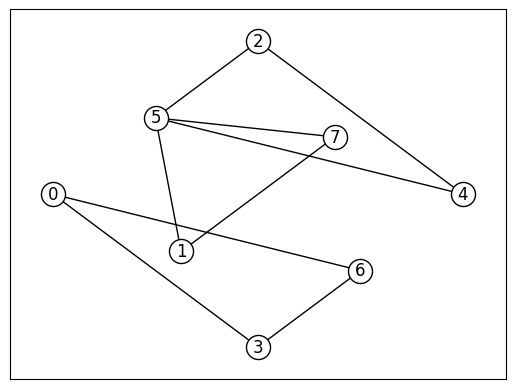

number of crossing for each edge: 
 2 0 1 2 0 0 0 1 0  

total nb of crossings (exact): 3 	 max nb of crossings per edge: 2

edges with the maximal number of crossings of 2:
edge 0: 0 -> 6
edge 3: 1 -> 7


In [82]:
input_file =  os.path.join(os.getcwd(), "venv", "Graph_Drawing_Contest", "graph_collection", "small_disconnected.json")
g_dis = Graph(parse_json(input_file))
g_dis.quick_graph_drawing()
initial_layout = GraphLayout(g_dis, layout_option="initial")
initial_crossings = initial_layout.compute_crossings()
initial_max_crossings = initial_layout.max_crossings(print_all_crossings=True)

In [10]:
initial_layout.layout

{0: (0.0, 8.0),
 1: (5.0, 5.0),
 2: (8.0, 16.0),
 3: (8.0, 0.0),
 4: (16.0, 8.0),
 5: (4.0, 12.0),
 6: (12.0, 4.0),
 7: (11.0, 11.0)}

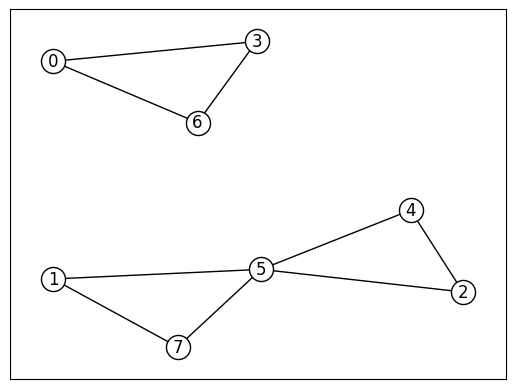

Coordinates: {0: (40.0, 203.08071201249203), 1: (40.0, 78.8078634365292), 2: (134.4995778862319, 71.37491500764736), 3: (86.9277203444857, 214.4455662995617), 4: (122.4153166679639, 118.12254119675654), 5: (87.97280046943095, 84.28344215042512), 6: (73.30611271361923, 168.12254119675654), 7: (68.72837698344453, 40.0)}


In [88]:
spring_emb_layout_dis = GraphLayout(g_dis, layout_option="SpringEmbedderGridVariant")
spring_emb_layout_dis.quick_graph_drawing()
print(f"Coordinates: {spring_emb_layout_dis.layout}")

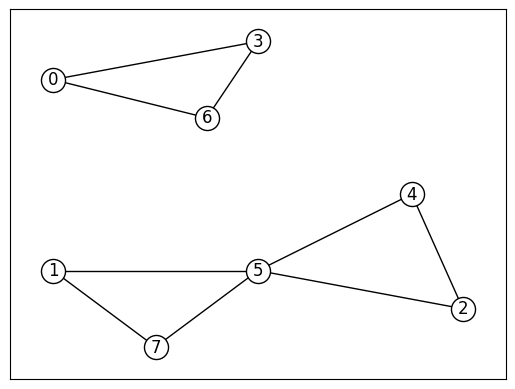

Coordinates: {0: (0, 7), 1: (0, 2), 2: (8, 1), 3: (4, 8), 4: (7, 4), 5: (4, 2), 6: (3, 6), 7: (2, 0)}


In [89]:
spring_emb_layout_dis.resize()
spring_emb_layout_dis.quick_graph_drawing()
print(f"Coordinates: {spring_emb_layout_dis.layout}")

# Example of use: small graph

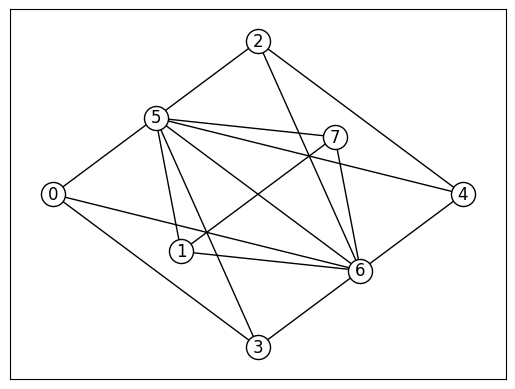

number of crossing for each edge: 
 0 3 0 1 5 1 0 3 0 1 1 3 0 0 3 1  

total nb of crossings (exact): 11 	 max nb of crossings per edge: 5

edges with the maximal number of crossings of 5:
edge 4: 1 -> 7


In [90]:
input_file1 =  os.path.join(os.getcwd(), "venv", "Graph_Drawing_Contest", "graph_collection", "automatic_1_2024_11_crossings.json")
g1 = Graph(parse_json(input_file1))
g1.quick_graph_drawing()
initial_layout1 = GraphLayout(g1, layout_option="initial")
initial_crossings1 = initial_layout1.compute_crossings()
initial_max_crossings1 = initial_layout1.max_crossings(print_all_crossings=True)

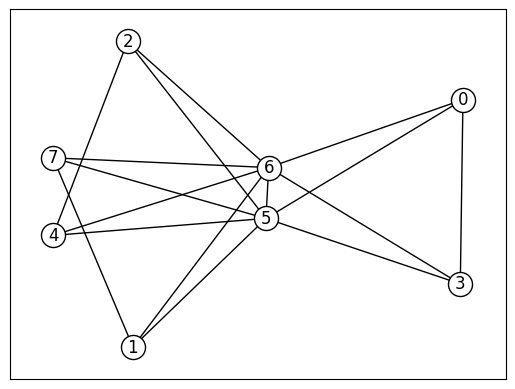

number of crossing for each edge: 
 1 0 0 0 3 3 3 0 3 3 2 2 3 1 0 0  

total nb of crossings (exact): 12 	 max nb of crossings per edge: 3

edges with the maximal number of crossings of 3:
edge 4: 1 -> 7
edge 5: 1 -> 6
edge 6: 2 -> 5
edge 8: 2 -> 4
edge 9: 7 -> 5
edge 12: 4 -> 6


In [91]:
# Drawing with FMMM layout
fmmm_layout1 = GraphLayout(g1,layout_option="FMMMLayout")
fmmm_layout1.quick_graph_drawing()
fmmm_crossings1 = fmmm_layout1.compute_crossings()
fmmm_max_crossings1 = fmmm_layout1.max_crossings(print_all_crossings=True)

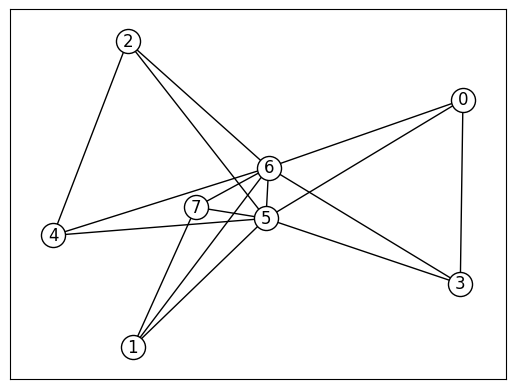

number of crossing for each edge: 
 1 0 0 0 1 3 3 0 0 1 1 2 1 1 0 0  

total nb of crossings (exact): 7 	 max nb of crossings per edge: 3

edges with the maximal number of crossings of 3:
edge 5: 1 -> 6
edge 6: 2 -> 5


In [92]:
# Let's try to change some coordinates: we could for instance place node 7 in the triangle formed by nodes 4, 5 and 6:
l = fmmm_layout1.layout
l[7] = ((l[4][0] + l[5][0] + l[6][0])/3, (l[4][1] + l[5][1] + l[6][1])/3)
fmmm_layout1.GA.x[g1.G.nodes[7]], fmmm_layout1.GA.y[g1.G.nodes[7]] = l[7]
fmmm_layout1.quick_graph_drawing()
new_crossings = fmmm_layout1.compute_crossings()
new_max_crossings = fmmm_layout1.max_crossings(print_all_crossings=True)

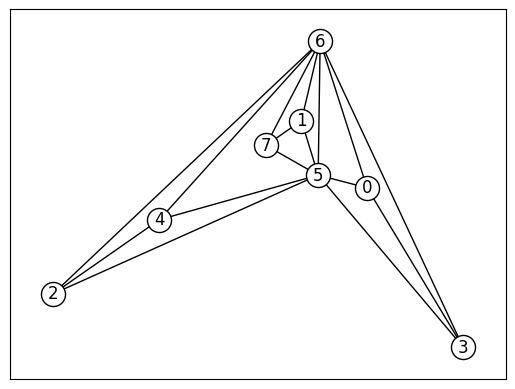

In [93]:
# we could now place node 1 in the triangle formed by nodes 5, 6 and 7, 
# and place node 2 on the line throuh 4 and 7 left from 4,
# and place node 0 in the triangle formed by nodes 3, 5 and 6
l[1] = ((l[5][0] + l[6][0] + l[7][0])/3, (l[5][1] + l[6][1] + l[7][1])/3)
fmmm_layout1.GA.x[g1.G.nodes[1]], fmmm_layout1.GA.y[g1.G.nodes[1]] = l[1]

l[2] = (2*l[4][0] - l[7][0], 2*l[4][1] - l[7][1])
fmmm_layout1.GA.x[g1.G.nodes[2]], fmmm_layout1.GA.y[g1.G.nodes[2]] = l[2]

l[0] = ((l[3][0] + l[5][0] + l[6][0])/3, (l[3][1] + l[5][1] + l[6][1])/3)
fmmm_layout1.GA.x[g1.G.nodes[0]], fmmm_layout1.GA.y[g1.G.nodes[0]] = l[0]

fmmm_layout1.quick_graph_drawing()
new_crossings = fmmm_layout1.compute_crossings()

# Medium graph (graph 6 from 2024 contest)

In [94]:
input_file6 =  os.path.join(os.getcwd(), "venv", "Graph_Drawing_Contest", "graph_collection", "automatic_6_2024_240_crossings.json")
g6 = Graph(parse_json(input_file6))

## Initial Layout

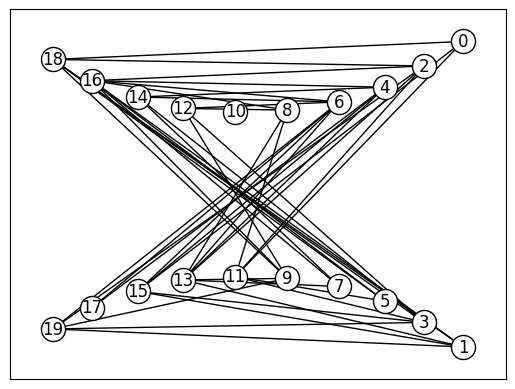

In [95]:
# Drawing with given layout
g6.quick_graph_drawing()

In [96]:
initial_layout_6 = GraphLayout(g6, layout_option="initial")
# initial_layout.L is the graph attributes from a layout, to enable the use of the ogdf library
initial_crossings_6 = initial_layout_6.ogdf_crossings()
max_edges_6 = initial_layout_6.ogdf_max_crossings(initial_crossings_6, print_all_crossings=True)

number of crossing for each edge:
 18 0 3 2 18 21 0 13 14 0 0 20 3 16 17 2 19 2 15 2 16 0 17 3 18 18 1 17 1 16 1 15 14 3 20 18 22 0 19 3 22 2 17 14 6 12 

total nb of crossings (approximate): 240 	 max nb of crossings per edge: 22

edges with the maximal number of crossings of 22:
edge 36: 8 -> 11
edge 40: 9 -> 12


## FMMM Layout

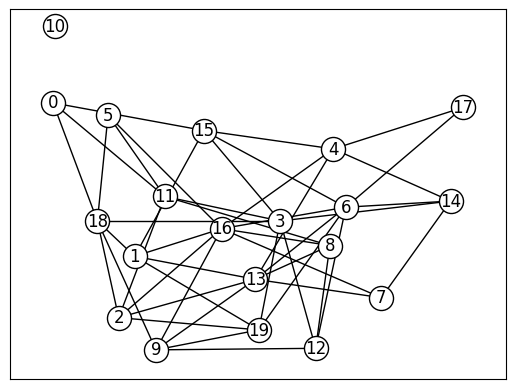

total nb of crossings (approximate): 74 	 max nb of crossings per edge: 10

edges with the maximal number of crossings of 10:
edge 36: 8 -> 11


In [103]:
fmmm_layout_6 = GraphLayout(g6, layout_option="FMMMLayout")
fmmm_layout_6.quick_graph_drawing()
fmmm_ogdf_crossings_6 = fmmm_layout_6.ogdf_crossings()
fmmm_ogdf_max_edges_6 = fmmm_layout_6.ogdf_max_crossings(fmmm_ogdf_crossings_6)

In [105]:
# more precise computation of crossings:
fmmm_crossings_6 = fmmm_layout_6.compute_crossings()
fmmm_max_crossings_6 = fmmm_layout_6.max_crossings()

total nb of crossings (exact): 68 	 max nb of crossings per edge: 9

edges with the maximal number of crossings of 9:
edge 36: 8 -> 11


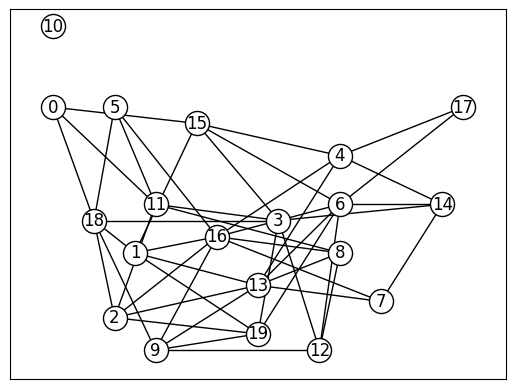

Coordinates: {0: (0, 15), 1: (4, 6), 2: (3, 2), 3: (11, 8), 4: (14, 12), 5: (3, 15), 6: (14, 9), 7: (16, 3), 8: (14, 6), 9: (5, 0), 10: (0, 20), 11: (5, 9), 12: (13, 0), 13: (10, 4), 14: (19, 9), 15: (7, 14), 16: (8, 7), 17: (20, 15), 18: (2, 8), 19: (10, 1)}


In [106]:
fmmm_layout_6.resize()
fmmm_layout_6.quick_graph_drawing()
print(f"Coordinates: {fmmm_layout_6.layout}")

In [107]:
fmmm_crossings_6 = fmmm_layout_6.compute_crossings()
fmmm_max_crossings_6 = fmmm_layout_6.max_crossings()

total nb of crossings (exact): 72 	 max nb of crossings per edge: 10

edges with the maximal number of crossings of 10:
edge 36: 8 -> 11


What if we swap the positions of vertices 13 and say 7: TO DO

## Stress Minimization Layout

Iteration count:	200	Stress:	13.5776


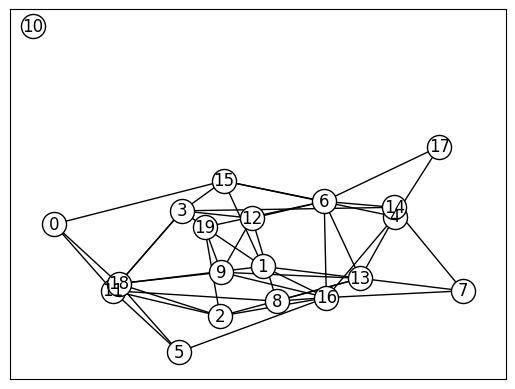

number of crossing for each edge:
 0 1 3 4 4 3 1 1 6 0 1 3 1 2 6 0 0 0 0 0 5 5 1 0 0 2 2 3 0 0 6 0 4 0 1 0 4 5 4 0 3 4 3 1 1 0 

total nb of crossings (approximate): 45 	 max nb of crossings per edge: 6

edges with the maximal number of crossings of 6:
edge 8: 2 -> 13
edge 14: 3 -> 14
edge 30: 6 -> 16


In [248]:
stress_min_layout_6 = GraphLayout(g6, layout_option="StressMinimization")
stress_min_layout_6.quick_graph_drawing()
stress_min_ogdf_crossings_6 = stress_min_layout_6.ogdf_crossings()
stress_min_ogdf_max_edges_6 = stress_min_layout_6.ogdf_max_crossings(stress_min_ogdf_crossings_6, print_all_crossings=True)

## Spring Embedder Grid Variant Layout

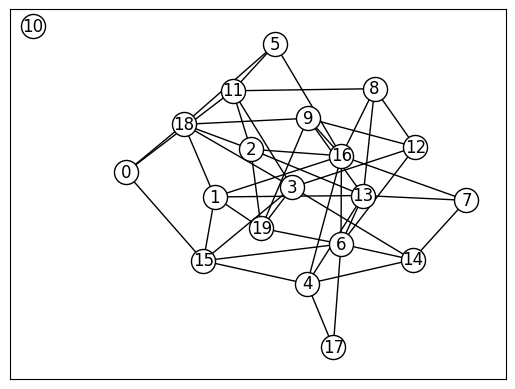

In [253]:
spring_emb_layout_6 = GraphLayout(g6, layout_option="SpringEmbedderGridVariant")
spring_emb_layout_6.quick_graph_drawing()

In [254]:
spring_emb_ogdf_crossings_6 = spring_emb_layout_6.ogdf_crossings()
spring_emb_max_edges_6 = spring_emb_layout_6.ogdf_max_crossings(spring_emb_ogdf_crossings_6, print_all_crossings=True)

number of crossing for each edge:
 0 0 7 0 6 1 1 1 6 3 1 4 5 6 6 4 4 1 4 1 0 7 0 0 2 0 3 1 0 2 6 1 2 1 0 3 1 0 3 1 3 5 0 3 7 4 

total nb of crossings (approximate): 58 	 max nb of crossings per edge: 7

edges with the maximal number of crossings of 7:
edge 2: 1 -> 13
edge 21: 4 -> 16
edge 44: 9 -> 19


# Larger graph (graph 9 from 2024 contest)

This graph has 160 vertices 

In [108]:
input_file_9 =  os.path.join(os.getcwd(), "venv", "Graph_Drawing_Contest", "graph_collection", "automatic_9_2024_1299494_crossings.json")
g9 = Graph(parse_json(input_file_9))

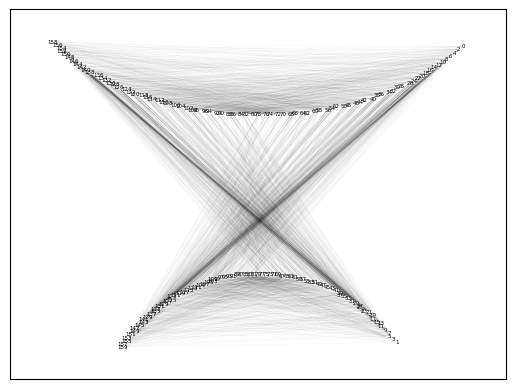

In [109]:
drawing_options = {
    "font_size": 4,
    "node_size": 10,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.001,
    "width": 0.01,
}

g9.quick_graph_drawing(drawing_options=drawing_options)

In [110]:
initial_layout_9 = GraphLayout(g9, layout_option="initial")
initial_ogdf_crossings_9 = initial_layout_9.ogdf_crossings()
initial_ogdf_max_edges_9 = initial_layout_9.ogdf_max_crossings(initial_ogdf_crossings_9)

 *** Break *** segmentation violation
 Generating stack trace...
 0x00007f886ca3ba14 in ogdf::SortedSequenceIteratorBase<ogdf::DSegmentHandle, ogdf::SeqItemXY, ogdf::SweepCmp, false, false>::succ() const at /project/ogdf/include/ogdf/basic/SortedSequence.h:452 from /home/suzanne/ogdf-python/venv/lib/libOGDF.so
 0x00007f886ca38f92 in ogdf::LayoutStatistics::intersectionGraph(ogdf::GraphAttributes const&, ogdf::Graph&, ogdf::NodeArray<ogdf::GenericPoint<double> >&, ogdf::NodeArray<ogdf::NodeElement*>&, ogdf::EdgeArray<ogdf::EdgeElement*>&) at /project/ogdf/src/ogdf/basic/LayoutStatistics_intersect.cpp:512 (discriminator 6) from /home/suzanne/ogdf-python/venv/lib/libOGDF.so
 0x00007f886ca32db5 in ogdf::LayoutStatistics::numberOfCrossings(ogdf::GraphAttributes const&) at /project/ogdf/src/ogdf/basic/LayoutStatistics.cpp:164 from /home/suzanne/ogdf-python/venv/lib/libOGDF.so
 0x00007f886d80a2de in <unknown> from /home/suzanne/ogdf-python/venv/lib/python3.12/site-packages/cppyy_backend/lib/l

SegmentationViolation: static ogdf::ArrayBuffer<int,int> ogdf::LayoutStatistics::numberOfCrossings(const ogdf::GraphAttributes& ga) =>
    SegmentationViolation: segfault in C++; program state was reset

In [111]:
initial_layout_9 = GraphLayout(g9, layout_option="initial")
initial_crossings_9 = initial_layout_9.compute_crossings()
initial_max_crossings_9 = initial_layout_9.max_crossings()

total nb of crossings (exact): 759492 	 max nb of crossings per edge: 1278

edges with the maximal number of crossings of 1278:
edge 56: 1 -> 156


Iteration count:	200	Stress:	2419.63


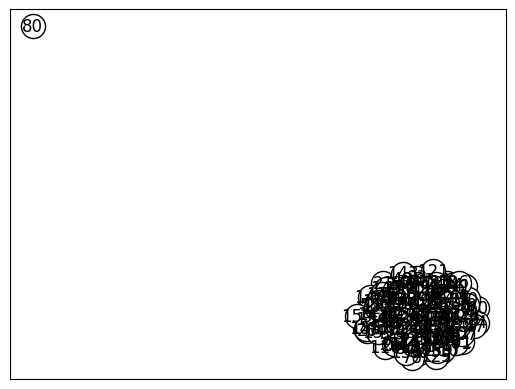

total nb of crossings (approximate): 475696 	 max nb of crossings per edge: 1016

edges with the maximal number of crossings of 1016:
edge 1344: 43 -> 116


In [112]:
stress_min_layout_9 = GraphLayout(g9, layout_option="StressMinimization")
stress_min_layout_9.quick_graph_drawing()
stress_min_ogdf_crossings_9 = stress_min_layout_9.ogdf_crossings()
stress_min_ogdf_max_edges_9 = stress_min_layout_9.ogdf_max_crossings(stress_min_ogdf_crossings_9)

In [113]:
stress_min_crossings_9 = stress_min_layout_9.compute_crossings()
stress_min_max_crossings_9 = stress_min_layout_9.max_crossings()

total nb of crossings (exact): 475696 	 max nb of crossings per edge: 1016

edges with the maximal number of crossings of 1016:
edge 1344: 43 -> 116


# Another large graph (graph 10 from 2024 contest)

This graph has 1589 vertices

In [265]:
input_file_15 =  os.path.join(os.getcwd(), "venv", "Graph_Drawing_Contest", "graph_collection", "automatic_15_2024_3709481_crossings.json")
g15 = Graph(parse_json(input_file_15))

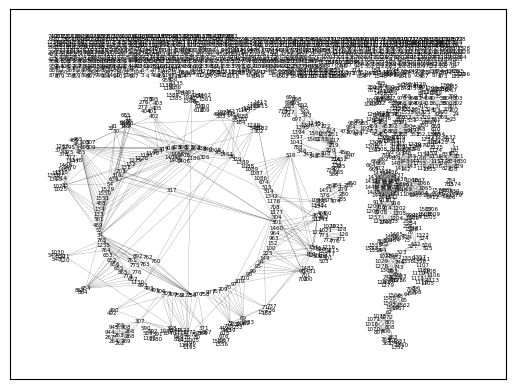

In [268]:
drawing_options = {
    "font_size": 4,
    "node_size": 10,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 0.001,
    "width": 0.1,
}

g15.quick_graph_drawing(drawing_options=drawing_options)